In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import fiona
import folium
import geopandas as gpd
import geoplot
pd.options.display.float_format = '{:,.4f}'.format
os.chdir(r'G:\My Drive\~DUG analysis')


## Food Access data from the census bureau:


In [2]:
fara=pd.read_excel('FoodAccessResearchAtlasData2019.xlsx',sheet_name='Food Access Research Atlas',header=0)
fara

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0000,0.0000,0,...,221.0000,"1,622.0000",217.0000,14.0000,0.0000,14.0000,45.0000,44.0000,6.0000,102.0000
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0000,8.3410,1,...,214.0000,888.0000,"1,217.0000",5.0000,0.0000,5.0000,55.0000,75.0000,89.0000,156.0000
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0000,0.0000,0,...,439.0000,"2,576.0000",647.0000,17.0000,5.0000,11.0000,117.0000,87.0000,99.0000,172.0000
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0000,0.0000,0,...,904.0000,"4,086.0000",193.0000,18.0000,4.0000,11.0000,74.0000,85.0000,21.0000,98.0000
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0000,1.6812,0,...,"1,126.0000","8,666.0000","1,437.0000",296.0000,9.0000,48.0000,310.0000,355.0000,230.0000,339.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0000,1.7138,0,...,593.0000,"3,106.0000",6.0000,15.0000,0.0000,27.0000,172.0000,309.0000,61.0000,64.0000
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0000,0.3752,0,...,399.0000,"2,377.0000",5.0000,23.0000,0.0000,40.0000,220.0000,446.0000,88.0000,41.0000
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0000,2.8718,0,...,516.0000,"2,312.0000",11.0000,10.0000,1.0000,26.0000,182.0000,407.0000,23.0000,64.0000
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0000,7.6041,0,...,499.0000,"3,179.0000",15.0000,10.0000,1.0000,47.0000,62.0000,91.0000,47.0000,34.0000


In [3]:
fara_variables = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx',sheet_name='Variable Lookup',header=0)
fara_variables

,Field,LongName,Description
0,CensusTract,Census tract,Census tract number
1,State,State,State name
2,County,County,County name
3,Urban,Urban tract,Flag for urban tract
4,POP2010,"Population, tract total",Population count from 2010 census
...,...,...,...
142,TractAIAN,Tract American Indian and Alaska Native popula...,Total count of American Indian and Alaska Nati...
143,TractOMultir,"Tract Other/Multiple race population, number",Total count of Other/Multiple race population ...
144,TractHispanic,"Tract Hispanic or Latino population, number",Total count of Hispanic or Latino population i...
145,TractHUNV,"Tract housing units without a vehicle, number",Total count of housing units without a vehicle...



# DUG garden locations


In [4]:
#read in the DUG garden location from GoogleMap .kml
fiona.drvsupport.supported_drivers['KML'] = 'rw'
DUG_locs = gpd.read_file('Denver Urban Gardens Community Gardens.kml', driver='KML')
DUG_locs

,Name,Description,geometry
0,36th & Lafayette Community Garden,"<img src=""https://doc-0k-7o-mymaps.googleuserc...",POINT Z (-104.97074 39.76709 0.00000)
1,Academia Sandoval School Community Garden,"<img src=""https://doc-0k-7o-mymaps.googleuserc...",POINT Z (-105.01513 39.76585 0.00000)
2,Agape Community Gardens on Williams (Not open ...,"<img src=""https://doc-10-7o-mymaps.googleuserc...",POINT Z (-104.96636 39.75920 0.00000)
3,Allison Gardens at Semper Farm,"<img src=""https://doc-0c-7o-mymaps.googleuserc...",POINT Z (-105.07087 39.86480 0.00000)
4,Anythink Commerce City Library Community Garden,"<img src=""https://doc-0g-7o-mymaps.googleuserc...",POINT Z (-104.91309 39.82675 0.00000)
...,...,...,...
183,Market Station Community Garden,"Address<br>1661 Market St., Denver CO 80202<br...",POINT Z (-104.99773 39.75054 0.00000)
184,Nome Community Garden,"<img src=""https://doc-0c-7o-mymaps.googleuserc...",POINT Z (-104.85148 39.73447 0.00000)
185,East Middle School Community Garden,Address<br>1275 Fraser Street<br><br>Micro Net...,POINT Z (-104.81309 39.73409 0.00000)
186,Mountain View International Garden,Address<br>10700 E. Evans Ave. Aurora<br><br>M...,POINT Z (-104.86325 39.67809 0.00000)



# Census Tract data


In [5]:
census_tracts2010 = gpd.read_file(r'G:\My Drive\~DUG analysis\tl_2010_08_tract10/tl_2010_08_tract10.shp')
census_tracts2010['CensusTract']=census_tracts2010['GEOID10'].astype('int64')
census_tracts2010

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,CensusTract
0,08,051,963900,08051963900,9639,Census Tract 9639,G5020,S,4262312145,41657300,+38.6285818,-107.2733857,"POLYGON ((-107.12846 38.81786, -107.12928 38.8...",8051963900
1,08,051,963700,08051963700,9637,Census Tract 9637,G5020,S,14502053,0,+38.5443371,-106.9270259,"POLYGON ((-106.95269 38.55070, -106.95230 38.5...",8051963700
2,08,051,963600,08051963600,9636,Census Tract 9636,G5020,S,3267477045,10725478,+38.6738961,-106.7096262,"POLYGON ((-106.51828 38.95152, -106.51670 38.9...",8051963600
3,08,051,963800,08051963800,9638,Census Tract 9638,G5020,S,844937722,789243,+38.8767371,-106.9086087,"POLYGON ((-106.77386 38.72978, -106.77400 38.7...",8051963800
4,08,021,974900,08021974900,9749,Census Tract 9749,G5020,S,2716323548,8848645,+37.2224342,-106.2441010,"POLYGON ((-105.91019 37.22490, -105.91184 37.2...",8021974900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,08,005,081000,08005081000,810,Census Tract 810,G5020,S,2372419,0,+39.7177635,-104.8179019,"POLYGON ((-104.82687 39.71730, -104.82687 39.7...",8005081000
1245,08,005,080300,08005080300,803,Census Tract 803,G5020,S,2526565,0,+39.6749395,-104.8564219,"POLYGON ((-104.86015 39.68204, -104.85898 39.6...",8005080300
1246,08,005,080400,08005080400,804,Census Tract 804,G5020,S,2418363,0,+39.6639878,-104.8501606,"POLYGON ((-104.84359 39.65845, -104.84377 39.6...",8005080400
1247,08,005,080800,08005080800,808,Census Tract 808,G5020,S,918778,0,+39.6993916,-104.8390190,"POLYGON ((-104.82995 39.69662, -104.83047 39.6...",8005080800


In [6]:
#confirm that all the Food Access Research Atlas tracts are in the shapefile we got from the census
fara[fara['State']=='Colorado']['CensusTract'].isin(census_tracts2010['CensusTract']).value_counts()

True    1242
Name: CensusTract, dtype: int64

In [7]:
#prep the census data to merge with the DUG x,y location data
census_tracts_for_merge=census_tracts2010[['geometry','CensusTract']]
census_tracts_for_merge.set_index('CensusTract',inplace=True)
census_tracts_for_merge

,geometry
CensusTract,
8051963900,"POLYGON ((-107.12846 38.81786, -107.12928 38.8..."
8051963700,"POLYGON ((-106.95269 38.55070, -106.95230 38.5..."
8051963600,"POLYGON ((-106.51828 38.95152, -106.51670 38.9..."
8051963800,"POLYGON ((-106.77386 38.72978, -106.77400 38.7..."
8021974900,"POLYGON ((-105.91019 37.22490, -105.91184 37.2..."
...,...
8005081000,"POLYGON ((-104.82687 39.71730, -104.82687 39.7..."
8005080300,"POLYGON ((-104.86015 39.68204, -104.85898 39.6..."
8005080400,"POLYGON ((-104.84359 39.65845, -104.84377 39.6..."


In [8]:
census_tracts2010.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands


# Combine things


In [61]:
fara.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0000,0.0000,0,...,221.0000,"1,622.0000",217.0000,14.0000,0.0000,14.0000,45.0000,44.0000,6.0000,102.0000
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0000,8.3410,1,...,214.0000,888.0000,"1,217.0000",5.0000,0.0000,5.0000,55.0000,75.0000,89.0000,156.0000
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0000,0.0000,0,...,439.0000,"2,576.0000",647.0000,17.0000,5.0000,11.0000,117.0000,87.0000,99.0000,172.0000
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0000,0.0000,0,...,904.0000,"4,086.0000",193.0000,18.0000,4.0000,11.0000,74.0000,85.0000,21.0000,98.0000
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0000,1.6812,0,...,"1,126.0000","8,666.0000","1,437.0000",296.0000,9.0000,48.0000,310.0000,355.0000,230.0000,339.0000


In [9]:
#map census tract to DUG x,y locations
gdf = gpd.GeoDataFrame(DUG_locs,geometry=DUG_locs['geometry']) # convert the DUG locations to a geodataframe
gdf=gdf.to_crs(crs=census_tracts2010.crs) #fix the CRS to match the CensusTract data
merged_file = gpd.sjoin(gdf, census_tracts_for_merge, how='left', predicate='within') #map it
merged_file.rename({'index_right':'CensusTract'},axis=1,inplace=True) #rename the column correctly

#get LILA indicator by Census Tract number, so we can then map this to the DUG x,y location data
LILAtracts=fara[['CensusTract','LILATracts_1And10']].set_index('CensusTract')
liladict=LILAtracts.to_dict()['LILATracts_1And10']
merged_file['LILA1and10']=merged_file['CensusTract'].map(liladict)

#get County by Census Tract number, so we can then map this to the DUG x,y location data
COtracts=fara[['CensusTract','County']].set_index('CensusTract')
COdict=COtracts.to_dict()['County']
merged_file['County']=merged_file['CensusTract'].map(COdict)

merged_file['County'].value_counts()

Denver County        108
Jefferson County      40
Arapahoe County       19
Adams County          17
Boulder County         2
Broomfield County      1
Douglas County         1
Name: County, dtype: int64

In [10]:
merged_file.groupby('County')['LILA1and10'].value_counts()

County             LILA1and10
Adams County       0             14
                   1              3
Arapahoe County    0             19
Boulder County     0              2
Broomfield County  0              1
Denver County      0             97
                   1             11
Douglas County     0              1
Jefferson County   0             38
                   1              2
Name: LILA1and10, dtype: int64

In [215]:
fara_variables

,Field,LongName,Description
0,CensusTract,Census tract,Census tract number
1,State,State,State name
2,County,County,County name
3,Urban,Urban tract,Flag for urban tract
4,POP2010,"Population, tract total",Population count from 2010 census
...,...,...,...
142,TractAIAN,Tract American Indian and Alaska Native popula...,Total count of American Indian and Alaska Nati...
143,TractOMultir,"Tract Other/Multiple race population, number",Total count of Other/Multiple race population ...
144,TractHispanic,"Tract Hispanic or Latino population, number",Total count of Hispanic or Latino population i...
145,TractHUNV,"Tract housing units without a vehicle, number",Total count of housing units without a vehicle...


In [51]:
poptracts=fara[['CensusTract','Pop2010']].set_index('CensusTract')
popdict=poptracts.to_dict()['Pop2010']
#popdict

statetracts=fara[['CensusTract','State']].set_index('CensusTract')
statedict=statetracts.to_dict()['State']
#statedict


basemap=census_tracts_for_merge.copy()
basemap['LILA1and10']=basemap.index.map(liladict)
basemap['County']=basemap.index.map(COdict)
basemap['Pop']=basemap.index.map(popdict)
basemap['State']=basemap.index.map(statedict)
basemap

,geometry,LILA1and10,County,Pop,State
CensusTract,,,,,
8051963900,"POLYGON ((-107.12846 38.81786, -107.12928 38.8...",1.0000,Gunnison County,905.0000,Colorado
8051963700,"POLYGON ((-106.95269 38.55070, -106.95230 38.5...",0.0000,Gunnison County,"6,124.0000",Colorado
8051963600,"POLYGON ((-106.51828 38.95152, -106.51670 38.9...",0.0000,Gunnison County,"3,794.0000",Colorado
8051963800,"POLYGON ((-106.77386 38.72978, -106.77400 38.7...",0.0000,Gunnison County,"4,501.0000",Colorado
8021974900,"POLYGON ((-105.91019 37.22490, -105.91184 37.2...",0.0000,Conejos County,"4,369.0000",Colorado
...,...,...,...,...,...
8005081000,"POLYGON ((-104.82687 39.71730, -104.82687 39.7...",0.0000,Arapahoe County,"5,450.0000",Colorado
8005080300,"POLYGON ((-104.86015 39.68204, -104.85898 39.6...",0.0000,Arapahoe County,"5,701.0000",Colorado
8005080400,"POLYGON ((-104.84359 39.65845, -104.84377 39.6...",0.0000,Arapahoe County,"4,500.0000",Colorado


(39.625, 39.92)

<Figure size 2000x2000 with 0 Axes>

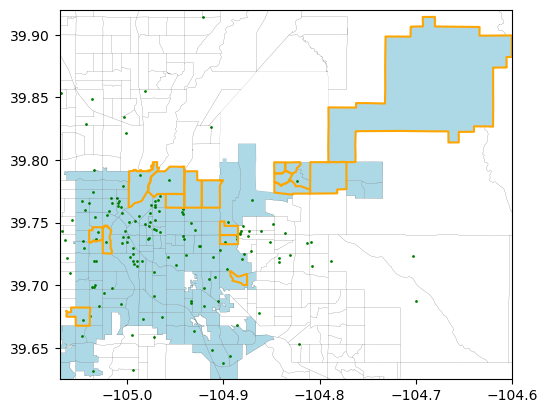

In [228]:
basemap=census_tracts_for_merge.copy()
basemap['LILA1and10']=basemap.index.map(liladict)
basemap['County']=basemap.index.map(COdict)
basemap['Pop']=basemap.index.map(popdict)
basemap['State']=basemap.index.map(statedict)

plt.figure(figsize=(20,20))
base=basemap[basemap['State']=='Colorado'].boundary.plot(color='black',linewidth=0.05)
basemap[basemap['County']=='Denver County'].plot(ax=base,color='lightblue')
basemap[(basemap['LILA1and10']==1)&(basemap['County']=='Denver County')].boundary.plot(ax=base,color='orange',label='Low Income and Low Food-Access')
merged_file.plot(ax=base,color='green',markersize=1)
plt.xlim(-105.07,-104.6)
plt.ylim(39.625,39.92)
plt.

In [ ]:
basemap[(basemap['LILA1and10']==1)&(basemap['County']=='Denver County')].explore()

In [39]:
fara_variables[fara_variables['Field']=='LILATracts_1And10']['Description'].to_list()

['Flag for low-income and low access when considering low accessibilty at 1 and 10 miles']

In [55]:
merged_file

,Name,Description,geometry,CensusTract,LILA1and10,County
0,36th & Lafayette Community Garden,"<img src=""https://doc-0k-7o-mymaps.googleuserc...",POINT Z (-104.97074 39.76709 0.00000),8031003601,0,Denver County
1,Academia Sandoval School Community Garden,"<img src=""https://doc-0k-7o-mymaps.googleuserc...",POINT Z (-105.01513 39.76585 0.00000),8031000402,0,Denver County
2,Agape Community Gardens on Williams (Not open ...,"<img src=""https://doc-10-7o-mymaps.googleuserc...",POINT Z (-104.96636 39.75920 0.00000),8031002300,0,Denver County
3,Allison Gardens at Semper Farm,"<img src=""https://doc-0c-7o-mymaps.googleuserc...",POINT Z (-105.07087 39.86479 0.00000),8059009827,0,Jefferson County
4,Anythink Commerce City Library Community Garden,"<img src=""https://doc-0g-7o-mymaps.googleuserc...",POINT Z (-104.91309 39.82675 0.00000),8001008705,0,Adams County
...,...,...,...,...,...,...
183,Market Station Community Garden,"Address<br>1661 Market St., Denver CO 80202<br...",POINT Z (-104.99773 39.75053 0.00000),8031001701,0,Denver County
184,Nome Community Garden,"<img src=""https://doc-0c-7o-mymaps.googleuserc...",POINT Z (-104.85148 39.73447 0.00000),8005007400,0,Arapahoe County
185,East Middle School Community Garden,Address<br>1275 Fraser Street<br><br>Micro Net...,POINT Z (-104.81309 39.73409 0.00000),8005081800,0,Arapahoe County
186,Mountain View International Garden,Address<br>10700 E. Evans Ave. Aurora<br><br>M...,POINT Z (-104.86325 39.67809 0.00000),8005080300,0,Arapahoe County


In [57]:
import folium

denvmetro=['Denver County','Adams County','Arapahoe County','Douglas County','Jefferson County','Broomfield County','Boulder County']

basemap.rename(columns={'LILA1and10':'Low-income_Low-food-access','Pop':'Population'},inplace=True)
basemap['Low-income_Low-food-access'].replace({0:"no",1:"yes"},inplace=True)

m = basemap[basemap['County'].isin(denvmetro)].explore(
    color='antiquewhite',
    name="CensusTracts2010" # name of the layer in the map
)

basemap[(basemap['Low-income_Low-food-access']=='yes')&(basemap['County'].isin(denvmetro))].explore(
    m=m,
    color='lightcoral',
    name='Low Income & Low Food Access'
)

merged_file.explore(
     m=m, # pass the map object
     color="seagreen", # use seagreen color on all points
     tooltip="Name", # show "name" column in the tooltip
     tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
     name="DUG" # name of the layer in the map
)

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

#m  # show map
m.save("Denver_DUG_LILATracts.html")

---
---
---

**"Defining Low-Income, Low-Access Food Areas"**, Congressional Research Service, 06-01-2021, page 1:
> - low-income (LI): poverty rate of 20% or greater, or median family income at or below 80% of the statewide or metropolitan area median family income; and 
> - low-access (LA): a low-income tract with at least 500 people or 33% of the tract’s population living more than 1 mile (urban areas) or more than 10 miles (rural areas) from the nearest supermarket or grocery store. (USDALA data are also available assuming different measures of distance, ranging 0.5 miles to 20 miles).
(https://crsreports.congress.gov/product/pdf/IF/IF11841)
----

**UDSA Food Access Research Atlas (FARA)**:
- info = https://www.ers.usda.gov/data-products/food-access-research-atlas/
- data = https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/
    - This is the "current", or most recent version of FARA, last updated 04-27-2021.
    - Note that even though this FARA is "current", it uses 2010 Census Tracts, not 2020.
----

**Census Tract Mapping data: US Census Bureau TIGER/Line Shapefiles**
- Main page = https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
- Download via web interface = https://www.census.gov/cgi-bin/geo/shapefiles/index.php 
    - Select year = 2010
    - Select layer type = Census Tracts
    - Submit
    - Census Tract (2010), Select a State = Colorado
- Note: we use 2010 Census Tract data to match the 2010 Tracts used in the FARA data from USDA.
----

**Denver Urban Gardens (DUG): Garden Directory**:
- website = https://dug.org/find-a-garden/
- linked Google Map = https://www.google.com/maps/d/viewer?mid=1DQq0JnovDqoXbygKTYweQsUfG4A&ll=39.74082951828451%2C-105.00433671452163&z=12
    - From the Google Map, click the 3-dot menu and "Download KML"
----
**ProPublica Nonprofit Explorer: Denver Urban Gardens, IRS Form 990s**:
- site = https://projects.propublica.org/nonprofits/organizations/742374848
- Note: ProPublica also has an API that allowed me to access this Form 990 information directly from Python as well. HOWEVER, because some of the more interesting information on "Operating Expenses" are included in item #24 of the IRS Form 990, which has "write-in" names of the expense categories, and those "write-in" names are not entered in the same order every year, and the "write-in" names change over time, I also referenced the PDF files to extract that information.

---
---
---